<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- Many economist see car sales as an indicator to GDP. They believe "if people feel rich, they will buy cars"

- With increasing GDP, people's living standard has also elevated globally. People are buying cars like never before but these all are not only the brand new cars but the used cars as well

- So what makes someone buy a used car?
  - A used car will be priced much less than the new car
  - It'll also fulfil the same purpose - status, comfort, convenience, etc
  - Used car can be a first choice for people who recently got their licence

- What you expect the most from a used car?
  - You want it to be as reliable as a new car
  - For this the used car companies have started focusing on the health of the car and after sales service

<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>


---
<a name = Section2></a>
# **2. Problem Statement**
---
- **Scenario:**

  - 'Dream Cars' is a company that buys & sells used cars
  - The company promise to provide three things
    - Best Price
    - Best Car Condition & Performance
    - Best After Sales Service
  - The company is looking to improve their business strategy & sales

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---


### **Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# To install more libraries insert your code here..

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling                          # Upgrading pandas profiling to the latest version

### **Importing Libraries**


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder                      # To perform label encoding
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- Lets check the available column names and their description of our used car dataset

|Id|Feature|Description|
|:--|:--|:--|
|01| car           | Car brand name| 
|02| model         | Available car different Variants|  
|03| year          | purchasing Year| 
|04| body          | Body type-Hatchback, Sedan, Crossover etc|   
|05| mileage       | car Mileage|
|06| engV          | Engine version|
|07| engType       | Car Fuel type - Petrol, Diesel, gas etc|
|08| drive         | Wheel Drive Front, back|
|09| registration  | Check if the vehicle is registered|
|10| price         | Price of Car in $|


### **4.1 Read Data**

In [4]:
df_cars = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
print('Data Shape:', df_cars.shape)
df_cars.head()

Data Shape: (9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [5]:
df_cars.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


### **4.2 Data Description**

In [6]:
df_cars.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


**Initial Observations:**

- Each observation here represents a car so we can say there are 9576 cars listed for sale, if there ain't any duplicate rows

- The average price of car is 15,633 dollars and average mileage is approx 139
- Minimum price is 0 which doesn't seems to be correct
- Also the max values of price, mileage and engV are way higher than their 75th percentile that indicates possible outliers in the data
- 75 % listed cars with purchased year between 2004 & 2016 - this is where we can focus


### **4.3 Data Information**

In [7]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [8]:
df_cars.car.nunique()

87

In [9]:
df_cars.car.value_counts().idxmax()

'Volkswagen'

In [10]:
df_cars.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

**Initial Observations:**

- There are missing values in engV(434) and drive(511) columns
- Total 87 car brands are listed
- Highest number of cars listed are from 'Volkswagen' brand

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- In this section we'll perform pre-profiling of the data to do the following:
    - Find duplicate rows
    - Find Missing Values and Outliers
    - Do a univariate analysis
    - Check if there is any existing correlation

In [11]:
profile = ProfileReport(df=df_cars)
profile.to_file(output_file='Pre-Profiling_Report_Cars.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Pre-profiling Observations:**

- 87 Duplicate rows found which is 0.9%
- Price has 267 zero values which is 2.8%
- Mileage has 348 zero values which is 3.6%
- Price and Purchase Year looks positively correlated
- Price and Mileage looks negatively correlated
- Mileage and Purchase Year also looks negatively correlated

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

### **6.1 Dropping Duplicate Rows**

In [12]:
df_cars.drop_duplicates(inplace=True)

In [13]:
df_cars.shape

(9463, 10)

### **6.2 Fixing Zero & Missing Values**

**6.2.1 Zero Values in Price**

In [14]:
df_cars.price=df_cars.price.replace(0,np.nan)
df_cars.price.isnull().sum()

240

In [15]:
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car','model','body','engType','engV','year'])['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car','model','body','engType','engV'])['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car','model','body','engType'])['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car','model','body'],)['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car','model'],)['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.groupby(['car'],)['price'].transform('median'))
df_cars['price']=df_cars['price'].fillna(df_cars.price.median())
df_cars.price.isnull().sum()

0

**6.2.2 Zero Values in Mileage**

In [16]:
df_cars.mileage=df_cars.mileage.replace(0,np.nan)
df_cars.mileage.isnull().sum()

310

In [17]:
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car','model','body','engType','engV','year'])['mileage'].transform('median'))
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car','model','body','engType','engV'])['mileage'].transform('median'))
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car','model','body','engType'])['mileage'].transform('median'))
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car','model','body'])['mileage'].transform('median'))
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car','model'])['mileage'].transform('median'))
df_cars['mileage']=df_cars['mileage'].fillna(df_cars.groupby(['car'])['mileage'].transform('median'))
df_cars.mileage.isnull().sum()

0

**6.2.3 Missing Values in Drive**

In [18]:
df_cars.drive.isnull().sum()

510

In [19]:
df_cars['drive']=df_cars['drive'].fillna(df_cars.groupby(['car','model','year'])['drive'].transform(lambda x:next(iter(x.mode()), np.nan)))
df_cars['drive']=df_cars['drive'].fillna(df_cars.groupby(['car','model'])['drive'].transform(lambda x:next(iter(x.mode()), np.nan)))
df_cars['drive']=df_cars['drive'].fillna(df_cars.groupby(['car'])['drive'].transform(lambda x:next(iter(x.mode()), np.nan)))
df_cars['drive'] = df_cars['drive'].fillna(df_cars['drive'].mode()[0])
df_cars.drive.isnull().sum()

0

**6.2.4 Missing Values in engV**

In [20]:
df_cars['engV'].isnull().sum()

434

In [21]:
df_cars['engV'] = df_cars['engV'].fillna(df_cars['engV'].mode()[0])
df_cars['engV'].isnull().sum()

0

### **6.3 Adding Car Categories Column**

In [22]:
df_cars['category']="Executive"
pd.options.mode.chained_assignment = None
df_cars['category'][df_cars['price']>30000]="Premium"
df_cars['category'][df_cars['price']>50000]="Luxury"
pd.options.mode.chained_assignment = 'warn'
df_cars.category.value_counts()

Executive    8380
Premium       545
Luxury        538
Name: category, dtype: int64

### **6.4 Removing outliers**

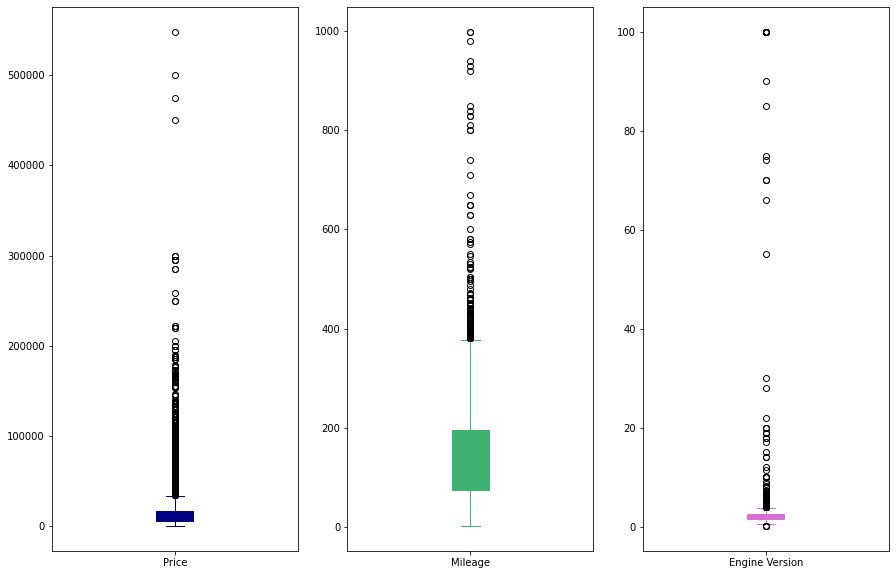

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
df_cars.price.plot(kind='box', patch_artist=True, color="navy", label="Price")
plt.subplot(1,3,2)
df_cars.mileage.plot(kind='box', patch_artist=True, color="mediumseagreen", label="Mileage")
plt.subplot(1,3,3)
df_cars.engV.plot(kind='box', patch_artist=True, color="orchid", label="Engine Version")

plt.show()

In [24]:
print(df_cars.price[df_cars.price>200000].count())
print(df_cars.mileage[df_cars.mileage>400].count())
print(df_cars.engV[df_cars.engV>5].count())

19
105
234


In [25]:
df_cars_clean=df_cars[((df_cars.price<=200000) & (df_cars.mileage<=400)) & (df_cars.engV<=5)].copy(deep=True)
print(df_cars_clean.shape)

(9124, 11)


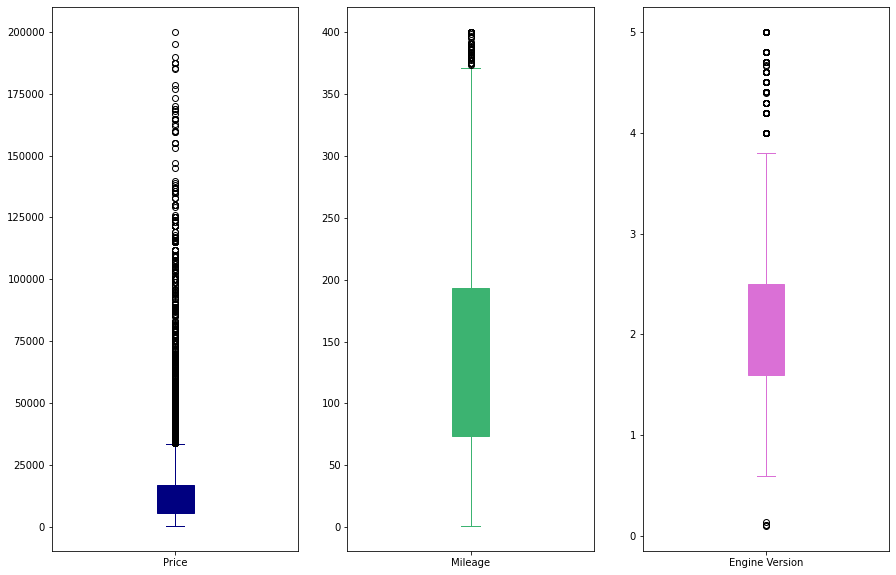

In [26]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
df_cars_clean.price.plot(kind='box', patch_artist=True, color="navy", label="Price")
plt.subplot(1,3,2)
df_cars_clean.mileage.plot(kind='box', patch_artist=True, color="mediumseagreen", label="Mileage")
plt.subplot(1,3,3)
df_cars_clean.engV.plot(kind='box', patch_artist=True, color="orchid", label="Engine Version")
plt.show()

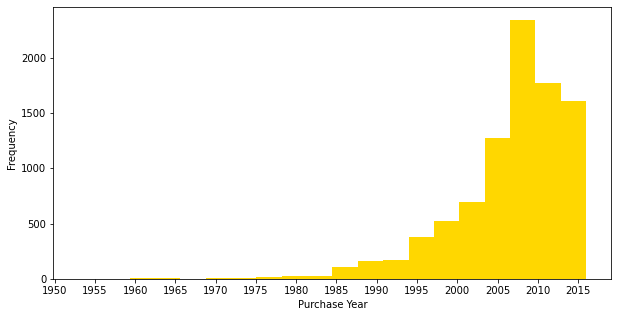

In [27]:
plt.figure(figsize=(10, 5))
df_cars_clean.year.plot(kind="hist",bins=20, color='gold')
plt.xticks(np.arange(1950, 2017, step=5))
plt.xlabel('Purchase Year')
plt.show()

In [28]:
df_cars_clean=df_cars_clean[df_cars_clean.year>1995]
df_cars_clean.shape

(8443, 11)

**Pre-processing Observations:**

- Pre-profiling showed 87 Duplicate rows however 113 duplicate rows dropped - seems to be some issue with the profiling report
- Zero values in Price replaced by median of price with repect to the brand, model, body etc
- Similar to the Price, zero value in mileage replaced with median
- engV & Drive replaced by mode value
- Dropped 339 rows of outliers from Price, Mileage & engV
- As per the data distribution by purchasing year we can focus on cars with purchase year after 1995, hence we dropped some more rows

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---
After cleaning the data, we'll again re-run the profiling report to see if it all issues are fixed and are there any new observations

In [29]:
profile = ProfileReport(df=df_cars_clean)
profile.to_file(output_file='Post-Profiling_Report_Cars.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations:**

- No duplicate rows
- No missing values
- No zero values
- There are still outliers in the price and mileage but we've removed the extreme outliers
- Data distribution looks much better

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

In [30]:
df_cars_clean.corr()

,price,mileage,engV,year
price,1.000000,-0.384403,0.476745,0.489601
mileage,-0.384403,1.000000,0.071530,-0.707738
engV,0.476745,0.071530,1.000000,-0.031451
year,0.489601,-0.707738,-0.031451,1.000000


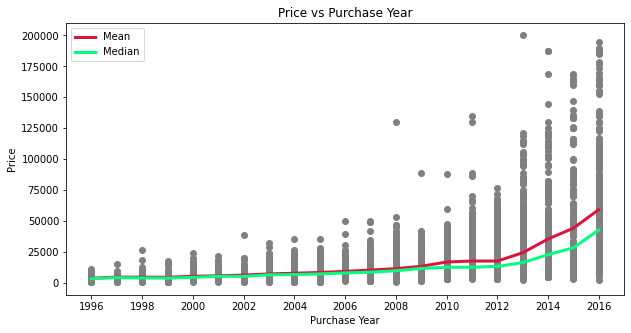

In [31]:
plt.figure(figsize=(10, 5))
plt.xlabel('Purchase Year')
plt.ylabel('Price')
plt.xticks(np.arange(1996, 2017, step=2))
plt.title('Price vs Purchase Year')
plt.scatter(df_cars_clean.year, df_cars_clean.price, color = 'grey')
plt.plot(df_cars_clean.price.groupby(df_cars_clean.year).agg('mean'), linestyle="-", linewidth=3, color='crimson')
plt.plot(df_cars_clean.price.groupby(df_cars_clean.year).agg('median'), linestyle="-", linewidth=3, color='springgreen')
plt.legend(["Mean", "Median"],loc='upper left')
plt.show()

- Car prices decreases over time

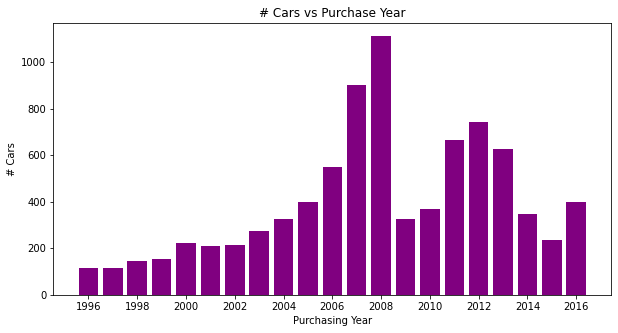

In [32]:
plt.figure(figsize=(10, 5))
plt.xlabel('Purchasing Year')
plt.ylabel('# Cars')
plt.title('# Cars vs Purchase Year')
plt.bar(df_cars_clean.year.value_counts().index, df_cars_clean.year.value_counts().values, color = 'purple')
plt.xticks(np.arange(1996, 2017, step=2))
plt.show()

- 2007 & 2008 cars are more in stock

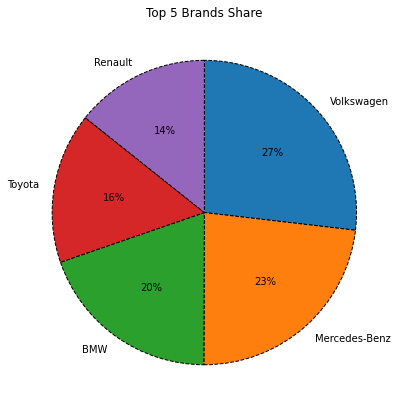

In [33]:
plt.figure(figsize=(7, 7))
df_cars_clean.car.value_counts()[:5].plot(kind='pie',label="", wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True}, counterclock=False, startangle=90,autopct='%1.0f%%')
plt.title('Top 5 Brands Share')
plt.show()

- Here we can seee the top 5 car brands available with us
- Volkswagen followed by Mercedes-Benz are the top two brands for sale

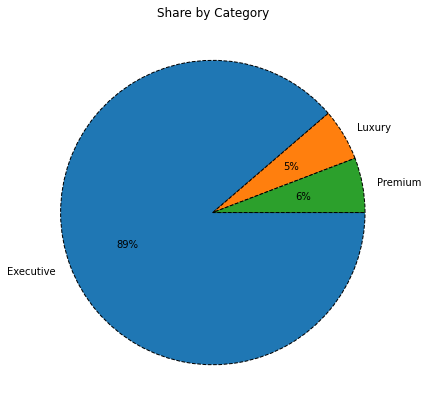

In [35]:
plt.figure(figsize=(7, 7))
df_cars_clean.groupby('category')['category'].agg('count').plot(kind='pie', label="", wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True}, counterclock=False,autopct='%1.0f%%')
plt.title('Share by Category')
plt.show()

- This pie chart is showing 89% of cars falls under the category 'Executive' i.e. priced up to 30000 dollars 
- Approx 6% are premium cars which are priced between 30,000 & 50,000 dollars
- Approx 5% are luxury cars are on sale which are priced higher than 50,000 dollar

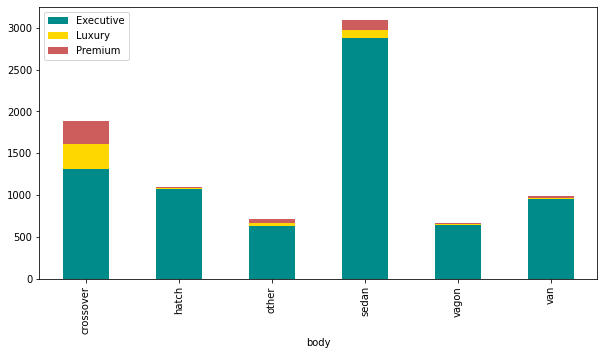

In [38]:
plt.rcParams["figure.figsize"] = (10,5)
df_cars_clean.groupby(['body','category']).size().unstack(level=-1).plot(kind='bar',stacked=True, color=["darkcyan", "gold", "indianred"])
plt.legend(loc='upper left')
plt.show()

- - Sedan is the most preferred in Executive class followed by crossover in Premium & Luxury class

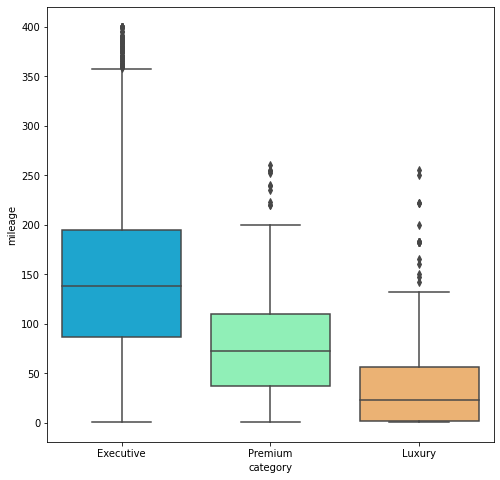

In [77]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='category', y='mileage',data=df_cars_clean, palette="rainbow")
plt.show()

- Executive cars comes with the highest mileage

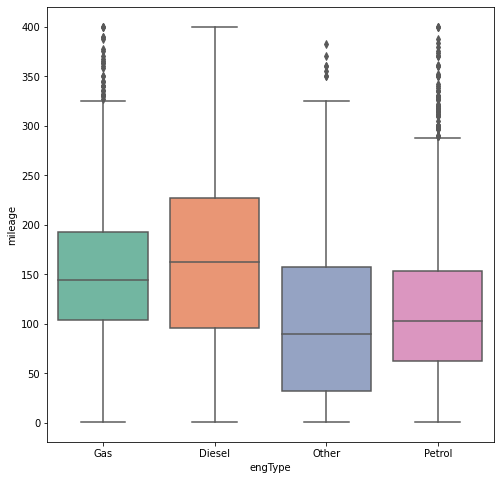

In [72]:
plt.figure(figsize=(8, 8))
plt.axes().set_xticks([2,4,6])
sns.boxplot(x='engType', y='mileage',data=df_cars_clean, palette="Set2")
plt.show()

- Diesel & Gas cars are the most fuel efficient cars

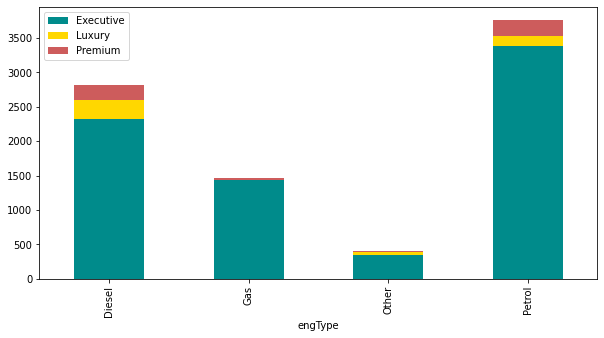

In [41]:
plt.rcParams["figure.figsize"] = (10,5)
df_cars_clean.groupby(['engType','category']).size().unstack(level=-1).plot(kind='bar',stacked=True, color=["darkcyan", "gold", "indianred"])
plt.legend(loc='best')
plt.show()

- Executive cars are available with all engTypes
- Luxury & Premimum cars are mostly available in Petrol or Diesel engType
- The most listed cars are Petrol followed by Diesel

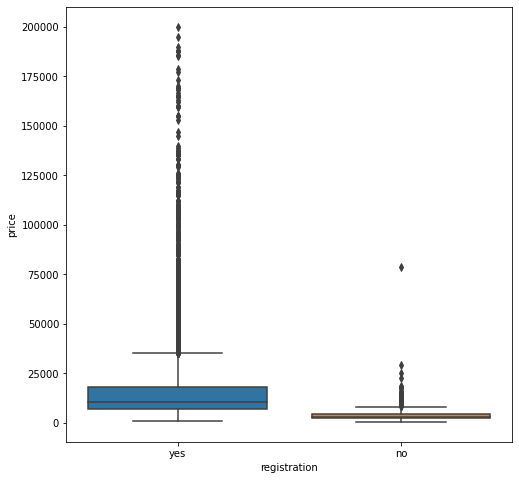

In [42]:
plt.figure(figsize=(8, 8))
plt.axes().set_xticks([2,4,6])
sns.boxplot(x='registration', y='price',data=df_cars_clean)
plt.show()

- Cars without registration are priced lower

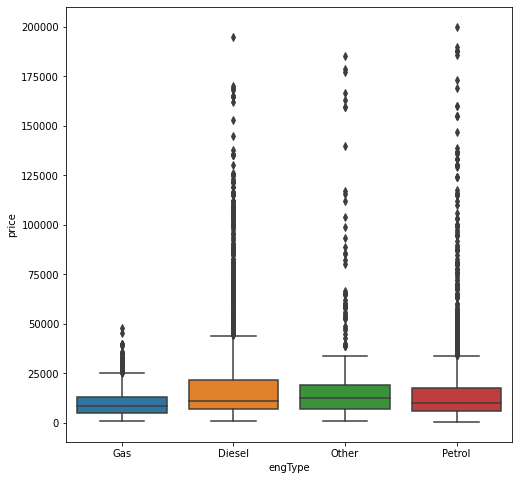

In [43]:
plt.figure(figsize=(8, 8))
plt.axes().set_xticks([2,4,6])
sns.boxplot(x='engType', y='price',data=df_cars_clean)
plt.show()

- Gas cars are the most economic

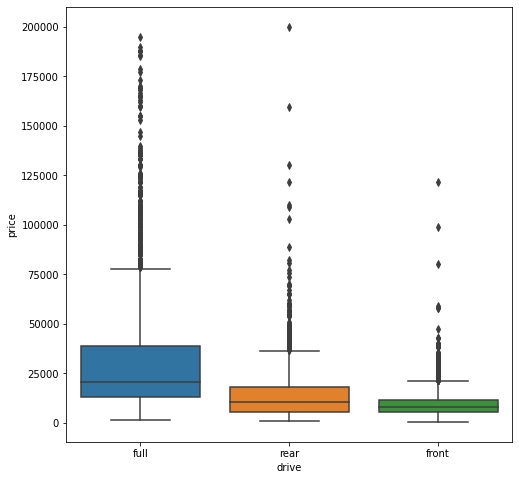

In [44]:
plt.figure(figsize=(8, 8))
plt.axes().set_xticks([2,4,6])
sns.boxplot(x='drive', y='price',data=df_cars_clean)
plt.show()

- Full drive cars are priced higher than front or rear drive

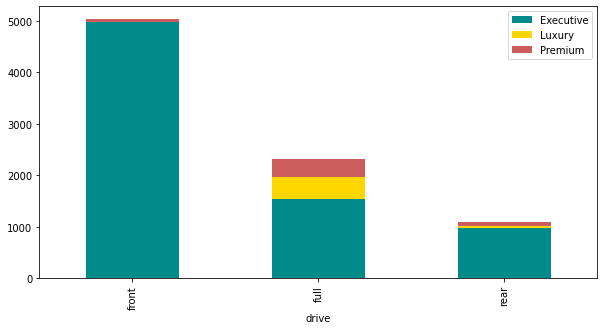

In [45]:
plt.rcParams["figure.figsize"] = (10,5)
df_cars_clean.groupby(['drive','category']).size().unstack(level=-1).plot(kind='bar',stacked=True, color=["darkcyan", "gold", "indianred"])
plt.legend(loc='best')
plt.show()

- Full drive is available in all categories Exectutive, Premium & Luxury

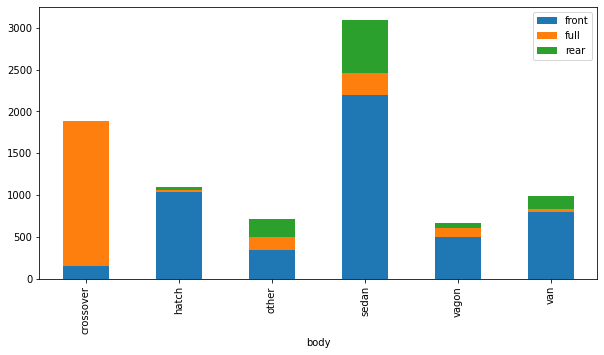

In [54]:
plt.rcParams["figure.figsize"] = (10,5)
df_cars_clean.groupby(['body','drive']).size().unstack(level=-1).plot(kind='bar',stacked=True)
plt.legend(loc='best')
plt.show()

- Sedan is all time favourite car followed by crossover
- Sedan cars are mostly front drive
- Crossover cars are mostly full drive

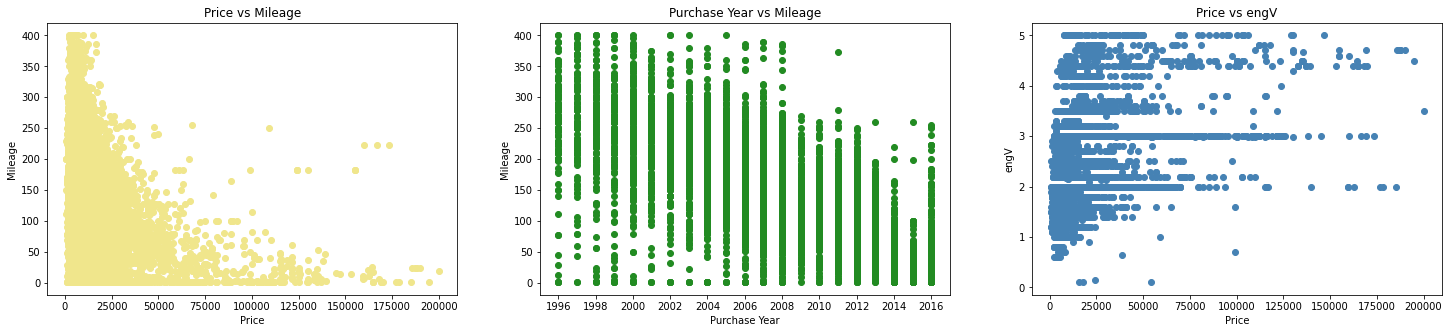

In [46]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price vs Mileage')
plt.scatter(df_cars_clean.price, df_cars_clean.mileage, color = 'khaki')
plt.subplot(1,3,2)
plt.xlabel('Purchase Year')
plt.ylabel('Mileage')
plt.title('Purchase Year vs Mileage')
plt.scatter(df_cars_clean.year, df_cars_clean.mileage, color = 'forestgreen')
plt.xticks(np.arange(1996, 2017, step=2))
plt.subplot(1,3,3)
plt.xlabel('Price')
plt.ylabel('engV')
plt.title('Price vs engV')
plt.scatter(df_cars_clean.price, df_cars_clean.engV, color = 'steelblue')
plt.show()

- 'Mileage' & 'Price' and 'Mileage' & 'Purchase Year' showing negative correlation (corr -0.4 & -0.7 respectively)
- engV and Price showing a positive correlation (0.5)
- Mileage decreases with increase in prices
- Mileage also decreases with increase in purchase year

In [47]:
datacopy = df_cars_clean.copy(deep=True)
datacopy.drop(labels=['price', 'mileage', 'engV', 'year'], axis=1, inplace=True)
encoder = LabelEncoder()
for i in datacopy.columns:
  datacopy[i] = encoder.fit_transform(datacopy[i].astype('str'))
print("Encoding Success")

Encoding Success


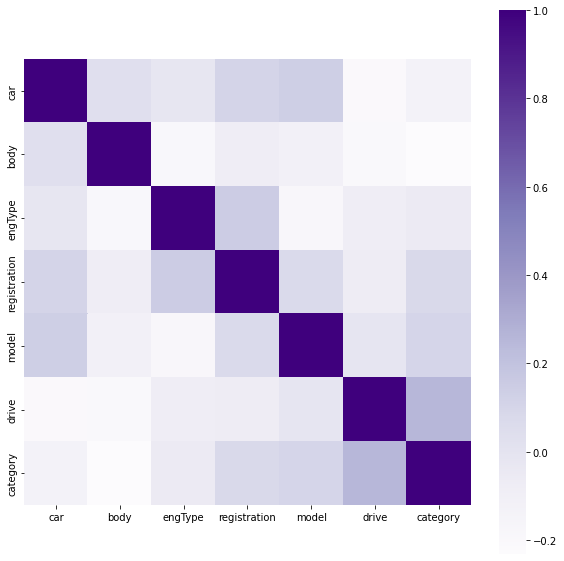

In [48]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(data=datacopy.corr(), vmax=1, square=True, annot=False, cmap="Purples")
plt.show()

In [49]:
datacopy.corr()

,car,body,engType,registration,model,drive,category
car,1.000000,0.035238,-0.019100,0.106391,0.138138,-0.198291,-0.126228
body,0.035238,1.000000,-0.186112,-0.081206,-0.110851,-0.193508,-0.231739
engType,-0.019100,-0.186112,1.000000,0.149166,-0.176048,-0.080248,-0.051929
registration,0.106391,-0.081206,0.149166,1.000000,0.073464,-0.063779,0.085316
model,0.138138,-0.110851,-0.176048,0.073464,1.000000,-0.007053,0.104126
drive,-0.198291,-0.193508,-0.080248,-0.063779,-0.007053,1.000000,0.258619
category,-0.126228,-0.231739,-0.051929,0.085316,0.104126,0.258619,1.000000


**Observations:**
- We tried to find a correlation between between the categorical columns however none is showing strong correlation

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

Some of the key take aways are as below:

- Car prices decreases over time (Car Depreciation)
- 2007 & 2008 car volume is higher than usual
- Volkswagen followed by Mercedes-Benz are the top two brands available for sale
- Approx 89% cars are 'Executive'class i.e. priced up to 30000 dollars
- Approx 6% cars are 'Premium' class i.e. priced between 30,000 & 50,000 dollars
- Approx 5% cars are 'Luxury' class i.e. priced higher than 50,000 dollar
- Sedan cars are preferred in Executive class while Crossover cars in Premium & Luxury class
- The most preferred cars are Petrol followed by Diesel
- Gas cars are the most economic in terms of price as well as fuel efficency
- Sedan is all time favorite car followed by crossover
- Crossover cars are mostly full drive

<a name = Section92></a>
### **9.2 Actionable Insights**

- Car prices being the most critical parameter needs an effective pricing system that can consider all factors that decides a car price.

- Crossover Petrol variant can be recommended to high profile customers

- Gas variant being the cheapest & fuel efficient can be recommended for customers looking for an economic car

- Old cars specially year 2007 & 2008 cars should be sold at special discount or attractive deals to clear the stock

- Year end sale with discounts can help to sale cars faster and at the right price